<a href="https://colab.research.google.com/github/pedropvsn/Oncase/blob/main/Oncase_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
#Importando as bibliotecas que normalmente são utilizadas para AED
import statsmodels.api as sm
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy.stats import zscore


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **BASES DE DADOS**

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
df_receita = pd.read_excel("/content/drive/My Drive/Colab/Oncase q1/Receita_json_Oficial.xlsx")

df_receita.head(5) ## percebe-se a presença de dados nulos "NaN"

Column1.fat  ... Column1.sodium
0          7.0  ...          559.0
1          7.0  ...          559.0
2          7.0  ...          559.0
3          7.0  ...          559.0
4          7.0  ...          559.0

[5 rows x 8 columns]

In [149]:
df_receita.shape

(244663, 8)

Renomear variáveis

In [150]:
df_receita.rename(columns={'Column1.fat': 'fat',
                           'Column1.date': 'date',
                           'Column1.categories': 'categories',
                           'Column1.calories': 'calories',
                           'Column1.protein': 'protein',
                           'Column1.rating': 'rating',
                           'Column1.title': 'title',
                           'Column1.sodium': 'sodium'}, inplace = True)

Validar se as células NaN foram excluídas

In [151]:
df_receita.isnull().sum() #quantidade de nulos por coluna

fat           51810
date             19
categories       78
calories      51343
protein       51622
rating           30
title            19
sodium        51347
dtype: int64

In [152]:
df_receita.dropna(axis=0, inplace=True)

## Tratando valores nulos da base Receita

In [153]:
df_receita.isnull().sum() #quantidade de nulos por coluna 

fat           0
date          0
categories    0
calories      0
protein       0
rating        0
title         0
sodium        0
dtype: int64

In [154]:
df_receita.shape # base atualizada

(192780, 8)

## Análise de Correlação



In [155]:
#matriz de correlação
corr = df_receita.corr()
corr

fat  calories   protein    rating    sodium
fat       1.000000  0.997042  0.685726  0.007843  0.988399
calories  0.997042  1.000000  0.712368  0.008436  0.996757
protein   0.685726  0.712368  1.000000  0.015586  0.710384
rating    0.007843  0.008436  0.015586  1.000000  0.008548
sodium    0.988399  0.996757  0.710384  0.008548  1.000000

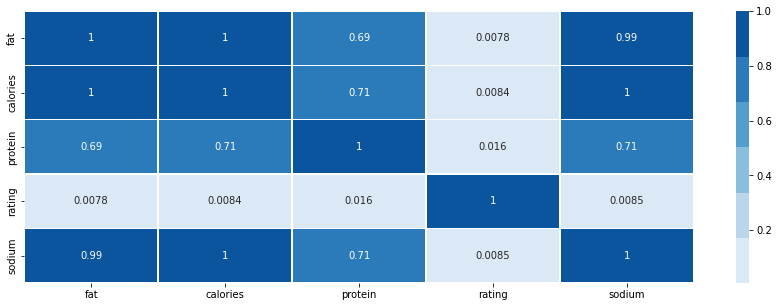

In [156]:
#Analisando a correlação graficamente

f, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(corr, cmap = sns.color_palette("Blues"), linewidths=.5, annot=True);

Ao realizar uma análise de correlação verificamos que a variável "rating", apresenta baixa relação com a quantidade de gordura, calorias, proteína e sódio contido no prato. Sendo assim, verifica-se que a avaliação dos pratos tem pouca influência destas taxas nutricionais.

## Medidas descritivas da base

In [ ]:
df_receita.describe().round(2)

fat     calories    protein     rating       sodium
count   192780.00    192780.00  192780.00  192780.00    192780.00
mean       384.23      6999.75     115.12       3.82      6765.12
std      21137.63    371658.11    4281.95       1.21    344023.34
min          0.00         0.00       0.00       0.00         0.00
25%          8.00       200.00       3.00       3.75        78.00
50%         17.00       331.00       8.00       4.38       278.00
75%         32.00       572.00      24.00       4.38       677.00
max    1722763.00  30111218.00  236489.00       5.00  27675110.00

Ao analisar uma análise prévia das medidas descritivas do dados, verifica-se grande variabilidade dos dados, bem como valores máximos bem discrepantes da média.

# Análise Gráfica das Variáveis

Segue abaixo análises dos individuais dos inicadores nutricionais.

## Variável *fat*



No gráfico abaixo percebe-se a forte influência dos outliers na visualização dos gráficos de boxplot. Sendo assim será neessário realizar um tratamento destes dados antes da análise gráfica.

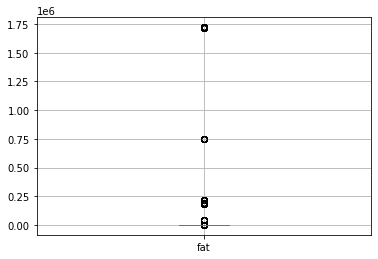

In [ ]:
df_receita.boxplot(['fat'])

In [ ]:
#tentativa de normalizar os dados para exclusão dos valores atípicos
#z_scores = stats.zscore(df_receita)
#calcula z-scores do dataframe
#print zscore('df_receita')
#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#new_df = df_receita[filtered_entries]

#print(new_df)

In [157]:
Fat = df_receita['fat'] #selecionando a variavel fat

In [ ]:
Q1 = Fat.quantile(.25)
Q3 = Fat.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
#Normalizando Variável *fat* 

selecao = (Fat >= limite_inferior) & (Fat <= limite_superior)
df_receita_new = df_receita[selecao]

In [ ]:
#gráfico dinâmico 
fig_fat = px.box(df_receita_new, y="fat")
fig_fat.show()

In [ ]:
fig_hist_fat = px.histogram(df_receita_new, x="fat")
fig_hist_fat.show()

## Variável *Protein*

In [ ]:
Protein = df_receita['protein'] #selecionando a variavel protein

In [ ]:
Q1 = Protein.quantile(.25)
Q3 = Protein.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
#Normalizando Variável *proteina* 

selecao = (Protein >= limite_inferior) & (Protein <= limite_superior)
df_receita_new = df_receita[selecao]

In [ ]:
fig_protein = px.box(df_receita_new, y="protein")
fig_protein.show()

In [ ]:
fig_hist_protein = px.histogram(df_receita_new, x="protein")
fig_hist_protein.show()

## Variável *Sodium*

In [ ]:
Sodium = df_receita['sodium'] #selecionando a variavel sodium

In [ ]:
Q1 = Sodium.quantile(.25)
Q3 = Sodium.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
#Normalizando Variável *proteina* 

selecao = (Sodium >= limite_inferior) & (Sodium <= limite_superior)
df_receita_new = df_receita[selecao]

In [ ]:
fig_sodium = px.box(df_receita_new, y="sodium")
fig_sodium.show()

In [ ]:
fig_hist_sodium = px.histogram(df_receita_new, x="sodium")
fig_hist_sodium.show()